# Histogram

In [1]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
uploaded = files.upload()

Saving flower1.jpg to flower1.jpg
Saving flower2.jpg to flower2.jpg


- Histogram

In [3]:
img1 = cv2.imread('flower1.jpg', 0)
img2 = cv2.imread('flower2.jpg', 0)

In [4]:
hist1 = cv2.calcHist([img1], [0], None, [256], [0,255])
hist2 = cv2.calcHist([img2], [0], None, [256], [0,255])

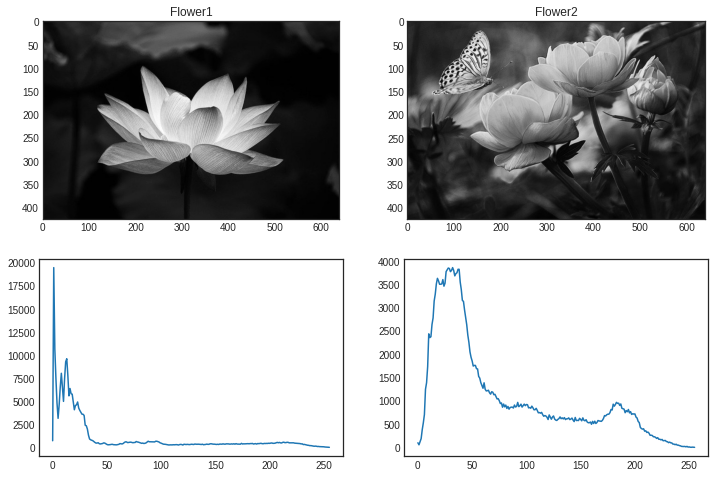

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img1, 'gray'), plt.title('Flower1')
plt.subplot(222), plt.imshow(img2, 'gray'), plt.title('Flower2')
plt.subplot(223), plt.plot(hist1)
plt.subplot(224), plt.plot(hist2)
plt.show()

- Mask를 적용한 히스토그램

In [6]:
uploaded = files.upload()

Saving cat.jpg to cat.jpg


In [8]:
img = cv2.imread('cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(427, 640, 3)

In [9]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[180:400, 260:600] = 255

In [10]:
masked_img = cv2.bitwise_and(img, img, mask=mask)

In [11]:
hist = cv2.calcHist([img], [1], None, [256], [0,255])
hist_mask = cv2.calcHist([img], [1], mask, [256], [0,255])

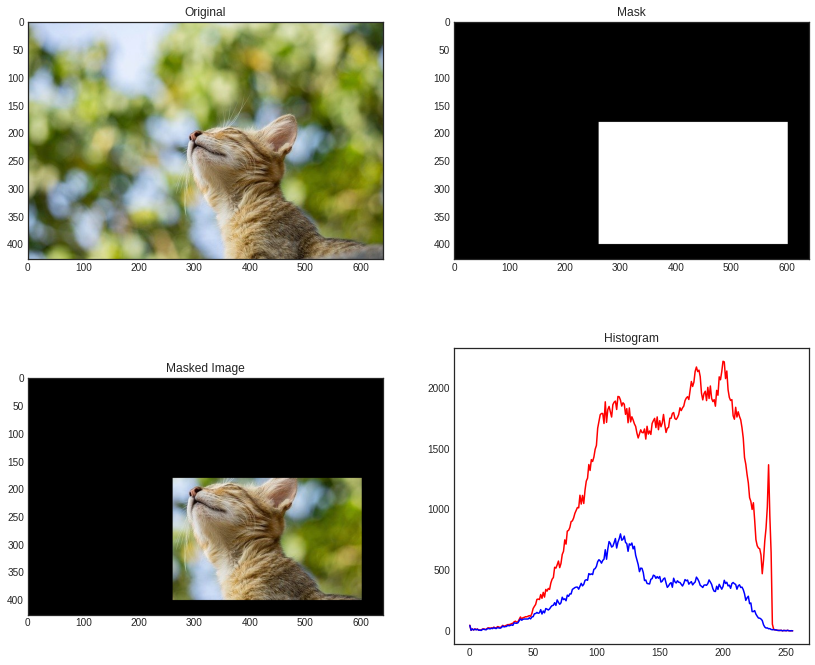

In [15]:
plt.figure(figsize=(14,12))
plt.subplot(221), plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(222), plt.imshow(mask, 'gray'), plt.title('Mask')
plt.subplot(223), plt.imshow(masked_img, 'gray'), plt.title('Masked Image')
plt.subplot(224), plt.plot(hist, 'r-'), plt.plot(hist_mask, 'b-'), plt.title('Histogram')
plt.show()

- 히스토그램 평탄화(Equalization)

In [16]:
uploaded = files.upload()

Saving taiwan.jpg to taiwan.jpg


In [17]:
img = cv2.imread('taiwan.jpg', 0)
img.shape

(427, 640)

- Numpy로 Equalization

In [18]:
hist, bins = np.histogram(img.flatten(), bins=256, range=[0,255])

In [19]:
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)

In [20]:
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

In [21]:
img2 = cdf[img]

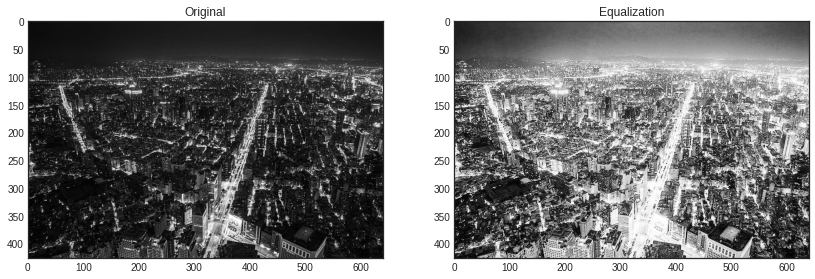

In [22]:
plt.figure(figsize=(14,6))
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(122), plt.imshow(img2, 'gray'), plt.title('Equalization')
plt.show()

- OpenCV로 Equalization

In [23]:
img2 = cv2.equalizeHist(img)

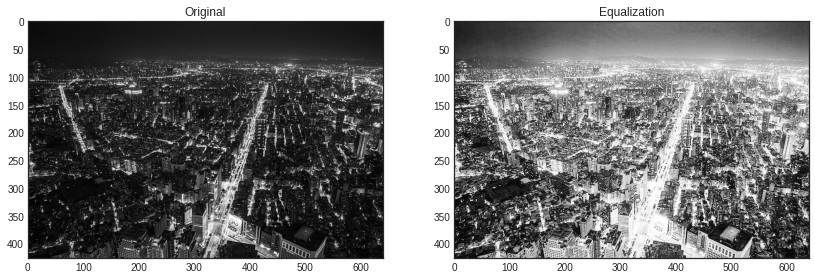

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(122), plt.imshow(img2, 'gray'), plt.title('Equalization')
plt.show()

- CLAHE(Contrast Limited Adaptive Histogram Equalization)

In [25]:
up = files.upload()

Saving keyboard.jpg to keyboard.jpg


In [26]:
img = cv2.imread('keyboard.jpg', 0)
img.shape

(360, 640)

In [27]:
img2 = cv2.equalizeHist(img)

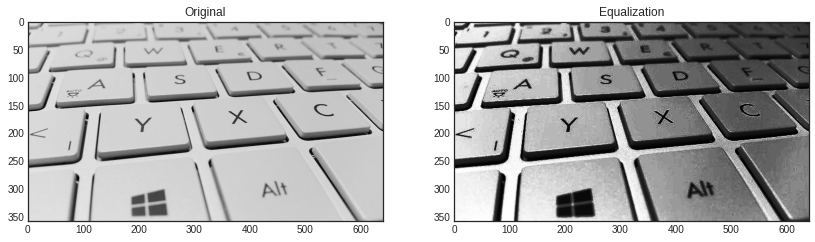

In [28]:
plt.figure(figsize=(14,6))
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(122), plt.imshow(img2, 'gray'), plt.title('Equalization')
plt.show()

- 위 결과에서 밝은 부분은 균일화가 적용되어 어두어졌지만, 일부 이미지 영역은 너무 어두워짐
- 이 문제를 해결하기 위해서 Adaptive historgram equalization을 적용하게 됨

In [29]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img2 = clahe.apply(img)

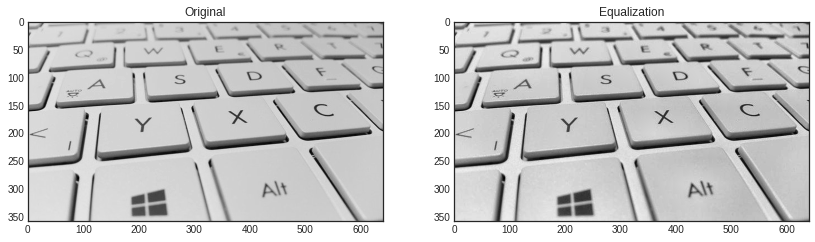

In [30]:
plt.figure(figsize=(14,6))
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(122), plt.imshow(img2, 'gray'), plt.title('Equalization')
plt.show()

- 2D Histogram

In [33]:
up = files.upload()

Saving canal.jpg to canal.jpg


In [34]:
img = cv2.imread('canal.jpg')
img.shape

(427, 640, 3)

In [35]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

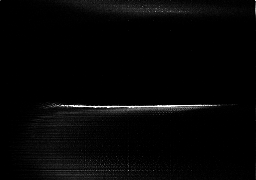

In [37]:
hist = cv2.calcHist([hsv], channels=[0,1], mask=None, histSize=[180,256], ranges=[0,180, 0,256])
cv2_imshow(hist)

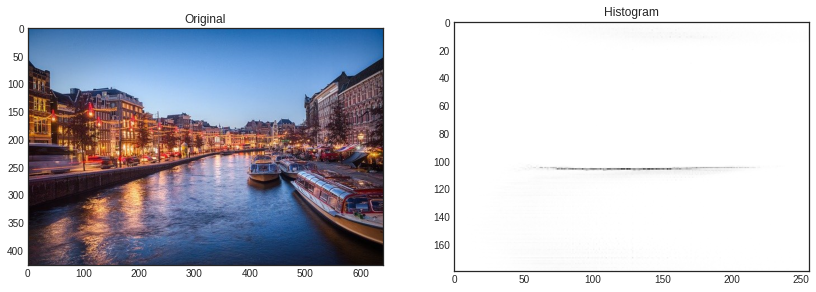

In [40]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14,6))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(hist), plt.title('Histogram')
plt.show()

- X: Saturation, Y: Hue
- HSV 모델에서 H가 100이면 하늘색
- 위 이미지는 하늘색이 많이 분포되어 있다는 것을 2D 히스토그램을 통해서 알 수 있음